###GDD Classify Pipeline

1. Step Set the run configuration.
Be sure to set java memory not over your usable RAM
If Metanome fails, be sure to use JAVA Version 18.0.2.1

In [1]:
from ipywidgets import Textarea, Button, VBox, Label
import json
config_path = "config.json"
    
# Load existing config
with open(config_path, "r") as f:
    config_text = f.read()

# Create editable text area
config_area = Textarea(
    value=config_text,
    placeholder='Edit JSON config here...',
    description='Config:',
    layout={'width': '100%', 'height': '200px'}
)

save_button = Button(description="Save Config", button_style="success")
status_label = Label(value="")

# Define save function
def save_config(b):
    try:
        new_config = json.loads(config_area.value)
        with open(config_path, "w") as f:
            json.dump(new_config, f, indent=4)
        status_label.value = "Config saved successfully!"
    except json.JSONDecodeError as e:
        status_label.value = f"❌ JSON Error: {str(e)}"

save_button.on_click(save_config)

# Display editor UI
VBox([config_area, save_button, status_label])

In [ ]:
#save JSON config to config df
with open(config_path, "r") as f:
    config = f.read()


Select a file that you want to classify

In [17]:
from ipywidgets import RadioButtons, FileUpload, VBox, Label
import os

java_exe = config["java_exe"]
test_base_dir_real = config["test_base_dir_real"]
test_base_dir_fake = config["test_base_dir_fake"]
metanome_jar = config["metanome_jar"]
java_memory = config["java_memory"]
# Ensure target folders exist
os.makedirs("UserData/realData", exist_ok=True)
os.makedirs("UserData/fakeData", exist_ok=True)
os.makedirs("UserData/realData/metanomeResults", exist_ok=True)
os.makedirs("UserData/fakeData/metanomeResults", exist_ok=True)
test_result_dir_real = os.path.join(test_base_dir_real, "metanomeResults")
test_result_dir_fake = os.path.join(test_base_dir_fake, "metanomeResults")

# Widget to choose target folder
folder_choice = RadioButtons(
    options=["realData", "fakeData"],
    description="Target:",
    value="realData"
)

# Widget to upload files
file_uploader = FileUpload(accept=".csv", multiple=False)
upload_status = Label(value="")

def handle_upload(change):
    upload_status.value = ""
    for fileinfo in file_uploader.value:
        filename = fileinfo["name"]
        content = fileinfo["content"]
        folder = f"UserData/{folder_choice.value}"
        save_path = os.path.join(folder, filename)

        with open(save_path, "wb") as f:
            f.write(content)

        upload_status.value = f"Uploaded '{filename}' to '{folder}'"

file_uploader.observe(handle_upload, names='value')

VBox([folder_choice, file_uploader, upload_status])


Starting full test pipeline with metrics...
Cleaning CSV files in UserData/realData ...
Cleaning UserData/realData\estat_sbs_sc_ovw_filtered_en.csv ...
Reading and processing: UserData/realData\estat_sbs_sc_ovw_filtered_en.csv


Reading: 100%|██████████| 1/1 [00:00<00:00, 470.32it/s]

⚠️ Only 106 rows found. Sampling skipped.
✅ Cleaned CSV saved to: UserData/realData\estat_sbs_sc_ovw_filtered_en.csv.tmp
Processing is complete and file has been overwritten with sampled data.
[2025-03-29 02:21:55] ✅ Metanome result already exists: UserData/realData\metanomeResults\.\estat_sbs_sc_ovw_filtered_en_Results.json, skipping.
Cleaning CSV files in UserData/fakeData ...
Found 1 datasets in 'UserData/realData'. Starting classification...
UserData/realData\estat_sbs_sc_ovw_filtered_en.csv classified as real in 42 ms.
No CSV datasets found in 'UserData/fakeData'.

 Classification Report:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

 Confusion Matrix:
[[1]]



C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


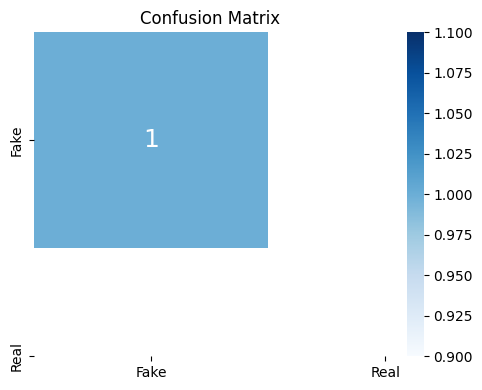

In [22]:
%run test_pipeline.py